In [1]:
import import_ipynb
from statistics import mean

from DCGAN import *

Current Displaying Device :  cuda
DNet(
  (main): Sequential(
    (0): Conv2d(3, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): LeakyReLU(negative_slope=0.2, inplace=True)
    (2): Conv2d(32, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): LeakyReLU(negative_slope=0.2, inplace=True)
    (5): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (6): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): LeakyReLU(negative_slope=0.2, inplace=True)
    (8): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (9): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): LeakyReLU(negative_slope=0.2, inplace=True)
    (11): Conv2d(256, 1, kernel_size=(4, 4), stride=(1, 1), bias=False)
  )
)
GNet(
  (main): Sequential(


In [2]:
"""
    :g -> GNet Class
    :d -> DNet Class
    :opt_g -> GNet's Adam parameter
    :opt_d -> DNet's Adam parameter
"""
def train_dcgan(g, d, opt_g, opt_d, loader):
    # An Array that tracks Generation-Model and Discrimination-Model 
    # by using Purpose-Function.
    log_loss_g = []
    log_loss_d = []
    
    for real_img, _ in tqdm.tqdm(loader):
        batch_len = len(real_img)
        
        # Copy Real-Images to GPU.
        # (
        #   But this computer model does not support CPU,
        #   so, I'm going to use CPU only.
        # )
        real_img = real_img.to(DISPLAY)
        
        # Generates Fake-Images by using Randomize-Number and
        # Generation-Model.
        z = torch.randn(batch_len, nz, 1, 1).to(DISPLAY)
        fake_img = g(z)
        
        # Save Fake-Images value only to use this later.
        fake_img_tensor = fake_img.detach()
        
        # Calculate Evaluation-Function of Generation-Model
        # about Fake-Images.
        out = d(fake_img)
        loss_g = loss_f(out, ones[: batch_len])
        log_loss_g.append(loss_g.item())
        
        # Since Calculation-Graph relies on 
        # both Generation-Model and Discrimination-Model, 
        # both sides perform differential calculation and parameter 
        # renewal after the Gradient-Descent is completed.
        d.zero_grad(), g.zero_grad()
        loss_g.backward()
        opt_g.step()
        
        # Calculate Discrimination-Model of Evaluation-Function
        # about Real-Images.
        real_out = d(real_img)
        loss_d_real = loss_f(real_out, ones[: batch_len])
        
        # Pytorch cannot backward for 2-times on Calculation-Graph
        # that included Equal-Tensor.
        # Therefore, Skip Unnecessary-Calculation by using Save-Tensor.
        fake_img = fake_img_tensor
        
        # Calculate Evaluation-Function of Discrimination-Model 
        # about Fake-Images.
        fake_out = d(fake_img_tensor)
        loss_d_fake = loss_f(fake_out, zeros[: batch_len])
        
        # Sum of Truth-Evaluation-Function.
        loss_d = loss_d_real + loss_d_fake
        log_loss_d.append(loss_d.item())
        
        # Update Discrimination-Model of Differential-Calculation
        # and Parameter.
        d.zero_grad(), g.zero_grad()
        loss_d.backward()
        opt_d.step()
    
    return mean(log_loss_g), mean(log_loss_d)

In [3]:
# Training DCGAN
# for epoch in range(300):
for epoch in range(20):
    train_dcgan(g, d, opt_g, opt_d, img_loader)
    
    # Save Training-Result in every 10-times iteration.
    if epoch % 10 == 0:
        # Save Parameter
        torch.save(
            g.state_dict(),
            "../04/g_{:03d}.prm".format(epoch),
            pickle_protocol=4
        )
        
        torch.save(
            d.state_dict(),
            "../04/d_{:03d}.prm".format(epoch),
            pickle_protocol=4
        )
        # Save Generated Image from 'z', for Monitoring.
        generated_img = g(fixed_z)
        save_image(generated_img,
                  "../04/g_{:03d}.jpg".format(epoch))

100%|██████████| 128/128 [01:58<00:00,  1.08it/s]


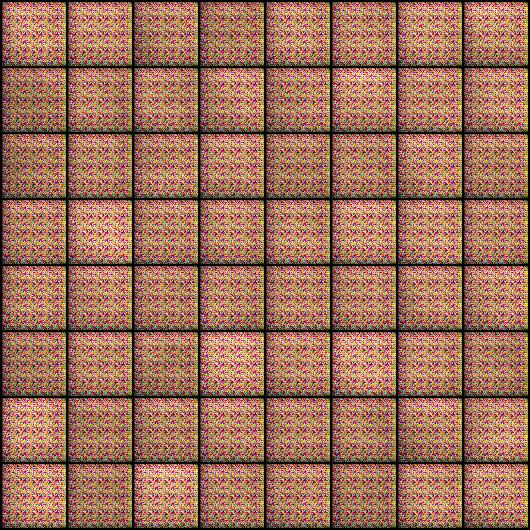

In [12]:
from IPython.display import Image, display_jpeg
display_jpeg(Image('../04/g_000.jpg'))